In [ ]:
# run this cell after session so the notebook won't stop running
#while True:pass

# New Section

## Install and import packages and libraries

In [ ]:
pip install geojson

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 14.8MB/s 
     |████████████████████████████████| 6.6MB 21.4MB/s 
     |████████████████████████████████| 15.4MB 210kB/s 


In [ ]:
pip install geoplot

     |████████████████████████████████| 12.1MB 13.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 32.3MB/s 
     |████████████████████████████████| 19.3MB 1.4MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516146 sha256=d804db12017aa1da7ea80f0dd55c9f84ef599c1a0047766c25d96ad1fa597e72
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=11cf4a2221a1c54209d6cfdb0eba8a45da97919414e507e934030e3af96d94b9
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
# import packages
import geojson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

## Mount to Google Drive

In [ ]:
# mount to drive
from google.colab import drive
drive.mount('/content/drive')

## Household Carbon Emissions DF

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Data Science/BrainStation/Colab/data/zip_results.xlsx')

In [ ]:
df

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,City,CountyName,CBSAType,CBSAName,MSAName,PMSA_Name,Region,Division,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
0,1001,16576,2.27,127300,45735,42.070743,-72.625036,70,MA,Massachusetts,AGAWAM,HAMPDEN,Metro,"Springfield, MA","Springfield, MA MSA",NaN,Northeast,New England,1351.201539,7350.449509,53042.803497,182.080258,22351,15.638928,11.475951,6.81,5.308949,6.071196,45.305024,7279,329775.266933
1,1002,36794,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Metro,"Springfield, MA","Springfield, MA MSA",NaN,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,10177,445854.242972
2,1005,5077,2.69,123800,50395,42.433445,-72.114991,475,MA,Massachusetts,BARRE,WORCESTER,Metro,"Worcester, MA","Boston-Worcester-Lawrence, MA-NH-ME-CT CMSA","Worcester, MA-CT PMSA",Northeast,New England,120.016408,7749.788691,21038.638333,595.222740,28008,19.192342,14.817438,8.07,5.764939,6.497346,54.342065,1979,107542.947356
3,1007,13017,2.65,145100,52425,42.278884,-72.410245,140,MA,Massachusetts,BELCHERTOWN,HAMPSHIRE,Metro,"Springfield, MA","Springfield, MA MSA",NaN,Northeast,New England,242.579110,7505.683391,21794.624043,546.546883,29962,20.486840,14.111831,7.95,5.880773,6.670959,55.100403,5065,279083.543255
4,1008,1235,2.68,128100,52663,42.143237,-72.930317,70,MA,Massachusetts,BLANDFORD,HAMPDEN,Metro,"Springfield, MA",NaN,NaN,Northeast,New England,23.707662,8174.445069,20478.550900,634.731912,33132,22.438266,15.495700,8.04,5.906753,6.693114,58.573833,525,30751.262386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31526,99925,955,2.74,114100,36328,55.555164,-133.094002,0,AK,Alaska,KLAWOCK,PRINCE WALES KETCHIKAN,NaN,NaN,NaN,NaN,West,Pacific,18.925748,6022.071770,23428.611918,504.031720,19543,13.399865,12.541041,8.22,4.881058,5.282491,44.324455,409,18128.702103
31527,99926,1447,2.95,104800,43516,55.131392,-131.491678,0,AK,Alaska,METLAKATLA,PRINCE WALES KETCHIKAN,NaN,NaN,NaN,NaN,West,Pacific,11.117909,6490.370595,21839.409660,515.621828,16656,11.861202,13.022926,8.85,5.416896,5.915490,45.066514,562,25327.381064
31528,99927,120,2.26,80600,17143,56.247484,-133.357185,0,AK,Alaska,POINT BAKER,PRINCE WALES KETCHIKAN,NaN,NaN,NaN,NaN,West,Pacific,8.703807,4984.944435,25418.469753,112.117934,7411,5.343660,6.939461,6.78,3.397453,3.585235,26.045810,91,2370.168687
31529,99929,2424,2.49,127600,43696,56.468324,-132.383670,0,AK,Alaska,WRANGELL,WRANGELL PETERSBURG,NaN,NaN,NaN,NaN,West,Pacific,2.273400,6280.346814,22678.031651,539.722361,20138,14.131708,13.063402,7.47,5.264022,5.907187,45.836319,1252,57387.071847


## 2020 US Election Results DF

In [ ]:
# I converted the geojson to a csv (and removed the geometry column to do so)
# It saves a metric ton of RAM, and decreases the data file size from 866MB to 6MB.
# Here's a link: https://drive.google.com/file/d/1_8VCSPJbtGBY_iT3mJ81zM4iTra6Nsiq/view?usp=sharing
# Dunc: thank you!
# We can always use the geojson later if we discover that the geometry is useful to plot it
df2 = pd.read_csv('/content/drive/My Drive/Data Science/BrainStation/Colab/data/election_results.csv')

In [ ]:
df2

,GEOID,COUNTY,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead
0,05047-1-A (Oz Wd 1),5047,79.0,279.0,366.0,54.2,-54.6
1,05149-11 - Dutch Creek,5149,6.0,31.0,37.0,0.3,-67.6
2,05081-Franklin Township,5081,53.0,383.0,450.0,3.8,-73.3
3,05027-McNeil City,5027,64.0,68.0,138.0,41.9,-2.9
4,05027-Taylor Township,5027,67.0,342.0,423.0,1.7,-65.0
...,...,...,...,...,...,...,...
146591,56007-01-01,56007,173.0,300.0,486.0,21.8,-26.1
146592,56045-05-01,56045,70.0,390.0,480.0,259.5,-66.7
146593,56045-05-02,56045,67.0,376.0,454.0,66.5,-68.1
146594,56045-05-03,56045,63.0,419.0,498.0,141.4,-71.5


# EDA

## Clean and examine
#### Take some steps to clean the data. Some specific questions to consider:

### 1.1 - What is the size of each data frame? How many rows? How many columns?

In [ ]:
df.describe()

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
count,31531.000000,31531.000000,31531.000000,3.153100e+04,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,31448.000000,31531.000000,31531.000000,31531.000000,31531.000000,31531.000000,3.153100e+04
mean,49960.985094,8910.310837,2.585086,1.051256e+05,39730.148267,38.910613,-91.059999,999.581777,1130.088828,11034.389620,37516.319919,97.421359,25081.638832,16.980136,14.439640,7.755258,5.043130,5.568718,49.748874,3668.983794,1.765234e+05
std,27190.912681,13032.530277,0.341909,8.978152e+04,16197.066163,5.116360,14.801973,1290.881610,4294.122749,2682.044623,17168.064854,166.455147,6913.248319,4.324491,3.418261,1.025728,1.069375,1.405190,8.337518,5149.337609,2.406803e+05
min,1001.000000,2.000000,1.000000,0.000000e+00,2499.000000,19.060680,-174.430124,0.000000,0.022884,2456.245588,3505.628749,0.000000,3271.000000,2.755386,3.843588,3.000000,2.220804,2.307464,16.529748,1.000000,5.617314e+01
25%,27590.000000,787.000000,2.400000,5.800000e+04,29877.000000,35.484274,-97.169206,248.000000,20.901737,9305.692873,24524.829655,0.153990,20962.500000,14.232573,12.191491,7.200000,4.383778,4.712672,44.509707,372.000000,1.862414e+04
50%,50040.000000,2775.000000,2.560000,8.280000e+04,36250.000000,39.517391,-88.358714,661.000000,71.233752,11221.324493,32195.365113,14.696323,24875.000000,16.768598,14.528254,7.680000,4.819537,5.267436,49.083492,1244.000000,6.211725e+04
75%,72034.000000,11843.500000,2.730000,1.222000e+05,45808.500000,42.119939,-80.446401,1082.000000,527.633855,12797.153320,48456.788842,107.620673,29042.500000,19.582230,16.786524,8.190000,5.454407,6.095813,54.430953,4931.500000,2.450414e+05
max,99950.000000,114124.000000,7.430000,1.000001e+06,200001.000000,70.669760,-66.993158,10190.000000,153873.584737,27728.955729,123259.133369,1024.031600,425781.000000,80.519842,33.059536,22.290000,15.705566,19.496106,144.724973,69449.000000,2.509112e+06


In [ ]:
df.shape

(31531, 31)

- emissions df has 31,531 rows and 31 columns

In [ ]:
df2.describe()

,COUNTY,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead
count,146596.000000,146500.000000,146500.000000,146500.000000,146500.000000,142609.000000
mean,29017.883462,502.591850,439.802812,960.460253,1073.152356,3.339162
std,16010.371314,833.281492,631.041229,1348.790866,4416.264004,46.625831
min,4001.000000,0.000000,0.000000,0.000000,0.000000,-100.000000
25%,16027.000000,138.000000,113.000000,368.000000,22.900000,-33.100000
50%,31141.000000,331.000000,286.000000,665.000000,339.200000,1.400000
75%,42013.000000,618.250000,542.000000,1166.000000,959.900000,38.300000
max,90151.000000,78209.000000,32778.000000,96247.000000,987935.300000,100.000000


In [ ]:
df2.shape

(146596, 7)

- election df has 146,596 rows and 7 columns

In [ ]:
# check if the values are categorical or numeric
df.dtypes

ZipCode                                          int64
Population                                       int64
PersonsPerHousehold                            float64
AverageHouseValue                                int64
IncomePerHousehold                               int64
Latitude                                       float64
Longitude                                      float64
Elevation                                        int64
State                                           object
StateFullName                                   object
City                                            object
CountyName                                      object
CBSAType                                        object
CBSAName                                        object
MSAName                                         object
PMSA_Name                                       object
Region                                          object
Division                                        object
popden    

In [ ]:
df2.dtypes

GEOID              object
COUNTY              int64
votes_dem         float64
votes_rep         float64
votes_total       float64
votes_per_sqkm    float64
pct_dem_lead      float64
dtype: object

In [ ]:
# check for null values
print(df.isnull().sum())

ZipCode                                            0
Population                                         0
PersonsPerHousehold                                0
AverageHouseValue                                  0
IncomePerHousehold                                 0
Latitude                                           0
Longitude                                          0
Elevation                                          0
State                                              0
StateFullName                                      0
City                                               0
CountyName                                         0
CBSAType                                        8823
CBSAName                                        8823
MSAName                                        16864
PMSA_Name                                      26173
Region                                             0
Division                                           0
popden                                        

In [ ]:
# what are the these null value columns?
df['CBSAType']

0        Metro
1        Metro
2        Metro
3        Metro
4        Metro
         ...  
31526      NaN
31527      NaN
31528      NaN
31529      NaN
31530    Micro
Name: CBSAType, Length: 31531, dtype: object

In [ ]:
# let's go ahead and drop those columns for now
df.drop(columns=['CBSAType', 'CBSAName', 'MSAName', 'PMSA_Name'], axis=1, inplace=True)

In [ ]:
df.head(2)

,ZipCode,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,City,CountyName,Region,Division,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr)
0,1001,16576,2.27,127300,45735,42.070743,-72.625036,70,MA,Massachusetts,AGAWAM,HAMPDEN,Northeast,New England,1351.201539,7350.449509,53042.803497,182.080258,22351,15.638928,11.475951,6.81,5.308949,6.071196,45.305024,7279,329775.266933
1,1002,36794,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,10177,445854.242972


In [ ]:
# check for null values
print(df.isnull().sum())

ZipCode                                         0
Population                                      0
PersonsPerHousehold                             0
AverageHouseValue                               0
IncomePerHousehold                              0
Latitude                                        0
Longitude                                       0
Elevation                                       0
State                                           0
StateFullName                                   0
City                                            0
CountyName                                      0
Region                                          0
Division                                        0
popden                                          0
electricity (kWh)                               0
Nat. Gas (cu.ft.)                               0
FUELOIL (gallons)                               0
Vehicle miles traveled                          0
Transport (tCO2e/yr)                            0


In [ ]:
# just the Housing (tCO2e/yr) column with 83 nulls. 
# perhaps we can impute the median value of the state for where those nulls are. 
# check df2 nulls
print(df2.isnull().sum())

GEOID                0
COUNTY               0
votes_dem           96
votes_rep           96
votes_total         96
votes_per_sqkm      96
pct_dem_lead      3987
dtype: int64


In [ ]:
# looks like the same nulls for votes columns, and a lot (3987) for pct_dem_lead 
## Inspect null rows for the columns
df2[df2['votes_dem'].isnull()]


,GEOID,COUNTY,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead
79527,32003-1365,32003,NaN,NaN,NaN,NaN,NaN
79735,32003-1644,32003,NaN,NaN,NaN,NaN,NaN
79764,32003-4613,32003,NaN,NaN,NaN,NaN,NaN
79863,32003-1533,32003,NaN,NaN,NaN,NaN,NaN
79989,32003-1376,32003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
81215,32031-8226,32031,NaN,NaN,NaN,NaN,NaN
81216,32031-7567,32031,NaN,NaN,NaN,NaN,NaN
81217,32031-7585,32031,NaN,NaN,NaN,NaN,NaN
81220,32031-7428,32031,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.head(2)

,GEOID,COUNTY,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead
0,05047-1-A (Oz Wd 1),5047,79.0,279.0,366.0,54.2,-54.6
1,05149-11 - Dutch Creek,5149,6.0,31.0,37.0,0.3,-67.6


In [ ]:
# Since zip-codes and election precincts don't map onto each other, we need to aggregate at the county level.
# So, before we merge, we're going to try and roll-up to the county level 
df3 = df2.groupby(['COUNTY'])[['votes_dem', 'votes_rep', 'votes_total']].agg('sum')
df3.reset_index(inplace=True)
df3

,COUNTY,votes_dem,votes_rep,votes_total
0,4001,22730.0,11240.0,34397.0
1,4003,22997.0,33580.0,57672.0
2,4005,44408.0,26914.0,72832.0
3,4007,8943.0,18375.0,27660.0
4,4009,4034.0,10747.0,14993.0
...,...,...,...,...
2526,90111,32265.0,23436.0,56855.0
2527,90130,22467.0,16579.0,39961.0
2528,90131,21539.0,18240.0,40585.0
2529,90150,9424.0,11640.0,21557.0


## ZIP-COUNTY and COUNTY-ZIP Crosswalk Merge

In [ ]:
# let's merge the votes df with HUD-USPS ZIP Crosswalk Files: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# before merging we'll have to just take the first 5 number from the GEOID column
## GEOID: unique identifier for the precinct, formed from the **five-digit county FIPS code** followed by the precinct name/ID (eg, 30003-08 or 39091-WEST MANSFIELD)
## I'm not sure how important the precinct code is
## If necessary, I can also merge the two on the CBSA	5 digit CBSA code for Micropolitan and Metropolitan Areas as defined by OMB in February of 2013. 
## ZIP codes with a CBSA code of ‘99999’ are not located within a CBSA. In Metropolitan Areas that are broken out into Divisions, the code reported is the CBSA Metropolitan Division code.

zip_county_df = pd.read_excel('/content/drive/My Drive/Data Science/BrainStation/Colab/data/ZIP_COUNTY_092014.xlsx')
# zip_county_df.drop(columns=['RES_RATIO', 'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO'], inplace=True)

In [ ]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51252 entries, 0 to 51251
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZIP        51252 non-null  int64  
 1   COUNTY     51252 non-null  int64  
 2   RES_RATIO  51252 non-null  float64
 3   BUS_RATIO  51252 non-null  float64
 4   OTH_RATIO  51252 non-null  float64
 5   TOT_RATIO  51252 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB


In [ ]:
county_zip_df = pd.read_excel('/content/drive/My Drive/Data Science/BrainStation/Colab/data/COUNTY_ZIP_032020.xlsx')
# county_zip_df.drop(columns=['RES_RATIO', 'BUS_RATIO', 'OTH_RATIO', 'TOT_RATIO'], inplace=True)

In [ ]:
# Another oddity: There are a total of 41,692 zip codes according to
# https://facts.usps.com/42000-zip-codes/.
#
# Also, I had a poor understanding of the relation between zip code and county...
# https://www.census.gov/newsroom/blogs/random-samplings/2014/07/understanding-geographic-relationships-counties-places-tracts-and-more.html
# Therein is a diagram of the "Standard Hierarchy of Census Geographic Entities"
# Apparently, according to https://greatdata.com/product/11/county-zipcode,
# zip codes span more than one county about 20% of the time.

county_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54181 entries, 0 to 54180
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTY     54181 non-null  int64  
 1   ZIP        54181 non-null  int64  
 2   RES_RATIO  54181 non-null  float64
 3   BUS_RATIO  54181 non-null  float64
 4   OTH_RATIO  54181 non-null  float64
 5   TOT_RATIO  54181 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.5 MB


In [ ]:
# rename the emissions df column to ZIP for another merge
df.rename(columns={"ZipCode": "ZIP"}, inplace=True)

In [ ]:
emissions_df = pd.merge(df, zip_county_df, how='left', on='ZIP')

In [ ]:
emissions_df.head(4)

,ZIP,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,City,CountyName,Region,Division,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCode,Total Zip Code Carbon Footprint (tCO2e/yr),COUNTY,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1001,16576,2.27,127300,45735,42.070743,-72.625036,70,MA,Massachusetts,AGAWAM,HAMPDEN,Northeast,New England,1351.201539,7350.449509,53042.803497,182.080258,22351,15.638928,11.475951,6.81,5.308949,6.071196,45.305024,7279,329775.266933,25013.0,1.000000,1.000000,1.000000,1.000000
1,1002,36794,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,10177,445854.242972,25015.0,0.988912,0.998864,0.996234,0.989902
2,1002,36794,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,10177,445854.242972,25011.0,0.011088,0.001136,0.003766,0.010098
3,1005,5077,2.69,123800,50395,42.433445,-72.114991,475,MA,Massachusetts,BARRE,WORCESTER,Northeast,New England,120.016408,7749.788691,21038.638333,595.222740,28008,19.192342,14.817438,8.07,5.764939,6.497346,54.342065,1979,107542.947356,25027.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
# This is odd: the left join on ZIP should theoretically not add any rows to the dataset.
# The fact that the resulting dataset has more rows means that one zip code can
# map to many county codes, and one county code can map to many zip codes.
# The ideal situation is that county-to-zip is one-to-many.

# Dunc: Not ideal! Just seeing now that it's why the ratio columns are provided
# Ben: Note above note-to-self from Ben and below info on ratios by Duncan
emissions_df.shape

(43106, 32)

In [ ]:
print(emissions_df.isnull().sum())

ZIP                                              0
Population                                       0
PersonsPerHousehold                              0
AverageHouseValue                                0
IncomePerHousehold                               0
Latitude                                         0
Longitude                                        0
Elevation                                        0
State                                            0
StateFullName                                    0
City                                             0
CountyName                                       0
Region                                           0
Division                                         0
popden                                           0
electricity (kWh)                                0
Nat. Gas (cu.ft.)                                0
FUELOIL (gallons)                                0
Vehicle miles traveled                           0
Transport (tCO2e/yr)           

In [ ]:
# Ben: With more time, one could try to get at some of these nulls by using another
# crosswalk from the CDC. Much larger files but they don't have ratios.
# Link: https://wonder.cdc.gov/wonder/sci_data/codes/fips/type_txt/cntyxref.asp

In [ ]:
votes_df = pd.merge(df3, county_zip_df, how='left', on='COUNTY')

In [ ]:
votes_df.head(8)

,COUNTY,votes_dem,votes_rep,votes_total,ZIP,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,4001,22730.0,11240.0,34397.0,86511.0,0.000000,0.006289,0.008197,0.000550
1,4001,22730.0,11240.0,34397.0,85940.0,0.000298,0.000000,0.008197,0.000550
2,4001,22730.0,11240.0,34397.0,86504.0,0.000000,0.000000,0.008197,0.000275
3,4001,22730.0,11240.0,34397.0,86503.0,0.000298,0.081761,0.024590,0.004672
4,4001,22730.0,11240.0,34397.0,85927.0,0.019059,0.031447,0.016393,0.019511
5,4001,22730.0,11240.0,34397.0,86538.0,0.000000,0.000000,0.008197,0.000275
6,4001,22730.0,11240.0,34397.0,86535.0,0.000000,0.006289,0.000000,0.000275
7,4001,22730.0,11240.0,34397.0,86502.0,0.000298,0.000000,0.008197,0.000550


In [ ]:
votes_df.shape

(45050, 9)

## Notes on `RATIO` columns

*   When a Census tract, county or CBSA is split by a ZIP code, that tract, county or CBSA code is duplicated in the crosswalk file. 

*   In the example below tract 01001020200 is split by two different ZIP codes, 36008 and 36067, which appear in the ZIP column. 

*   The ratio of residential addresses in the first tract-ZIP record to the total number of residential addresses in the tract is .0272 (2.72%). 

*   The remaining residential addresses in that tract (97.28%) fall into the second tract-ZIP record. 

*   So, for example, if one wanted to allocate data from Census tract 01001020200 to the ZIP code level, one would multiply the number of observations in the Census tract by the residential ratio for each ZIP code associated with that Census tract. 
*   Note that the sum of each ratio column for each distinct ZIP code may not always equal 1.00 (or 100%) due to rounding issues.




**Why do ZIP Codes appear multiple times in the Crosswalk Files?**

ZIP Codes have the potential to intersect with multiple geographies. Each record in the Crosswalk File represents a geography that intersects with a particular ZIP Code. For example, if you are reviewing a ZIP to County file, if a ZIP Code appears twice then it intersects with two counties. The ratio fields describe the percentage of the respective addresses that fall in both that ZIP Code and each county.

`RES_RATIO`	The ratio of residential addresses in the ZIP – Tract, County, or CBSA to the total number of residential addresses in the entire ZIP.
`BUS_RATIO`	The ratio of business addresses in the ZIP – Tract, County, or CBSA part to the total number of business addresses in the entire ZIP.
`OTH_RATIO`	The ratio of other addresses in the ZIP – Tract, County, or CBSA part to the total number of other addresses in the entire ZIP.
`TOTAL_RATIO`	The ratio of all addresses in the ZIP – Tract, County, or CBSA part to the total number of all types of addresses in the entire ZIP.



## Reorganize Emissions Data

In [ ]:
# how much memory are we using now with each dataframe?
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43106 entries, 0 to 43105
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ZIP                                          43106 non-null  int64  
 1   Population                                   43106 non-null  int64  
 2   PersonsPerHousehold                          43106 non-null  float64
 3   AverageHouseValue                            43106 non-null  int64  
 4   IncomePerHousehold                           43106 non-null  int64  
 5   Latitude                                     43106 non-null  float64
 6   Longitude                                    43106 non-null  float64
 7   Elevation                                    43106 non-null  int64  
 8   State                                        43106 non-null  object 
 9   StateFullName                                43106 non-null  object 
 10

In [ ]:
votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45050 entries, 0 to 45049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COUNTY       45050 non-null  int64  
 1   votes_dem    45050 non-null  float64
 2   votes_rep    45050 non-null  float64
 3   votes_total  45050 non-null  float64
 4   ZIP          45033 non-null  float64
 5   RES_RATIO    45033 non-null  float64
 6   BUS_RATIO    45033 non-null  float64
 7   OTH_RATIO    45033 non-null  float64
 8   TOT_RATIO    45033 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.4 MB


In [ ]:
# make a new dataframe for the emissions data by "ZipCounty"
zipcounty_emissions_df = emissions_df.copy()

In [ ]:
# for the zip codes with a null county code, let's just leave the data as is for now
# use 1.0 for the ratio
zipcounty_emissions_df['TOT_RATIO'].fillna(1, inplace=True)

In [ ]:

# Ideally we would multiply by the residental ratio for every column with data
# that is not expressed on a per-household basis. But in some cases, even though
# there are residential addresses in the zip-county, the ratio is 0. So we can
# use the total ratio (which always adds to ~1) as a close substitute instead.
#
# I'm sure there is a more elegant way of doing this... but: 
zipcounty_emissions_df['Population'] = emissions_df['Population'] * emissions_df['TOT_RATIO']
zipcounty_emissions_df['HouseholdsPerZipCode'] = emissions_df['HouseholdsPerZipCode'] * emissions_df['TOT_RATIO']
zipcounty_emissions_df['Total Zip Code Carbon Footprint (tCO2e/yr)'] = emissions_df['Total Zip Code Carbon Footprint (tCO2e/yr)'] * emissions_df['TOT_RATIO']

In [ ]:
zipcounty_emissions_df.rename(columns={'HouseholdsPerZipCode':'HouseholdsPerZipCounty',
                                       'Total Zip Code Carbon Footprint (tCO2e/yr)': 'Total ZipCounty Carbon Footprint (tCO2e/yr)'},
                              inplace=True)

In [ ]:
# verify that zipcodes spanning >1 county were indeed split
# and zipcodes with all addresses in a single county remain unchanged
# (the gross amounts in rows 2 and 3, for example, should be split proportionally to the TOT_RATIO)
zipcounty_emissions_df.head(4)

,ZIP,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,Latitude,Longitude,Elevation,State,StateFullName,City,CountyName,Region,Division,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2e/yr),HouseholdsPerZipCounty,Total ZipCounty Carbon Footprint (tCO2e/yr),COUNTY,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,1001,16576.000000,2.27,127300,45735,42.070743,-72.625036,70,MA,Massachusetts,AGAWAM,HAMPDEN,Northeast,New England,1351.201539,7350.449509,53042.803497,182.080258,22351,15.638928,11.475951,6.81,5.308949,6.071196,45.305024,7279.000000,329775.266933,25013.0,1.000000,1.000000,1.000000,1.000000
1,1002,36422.459804,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,10074.234207,441352.074883,25015.0,0.988912,0.998864,0.996234,0.989902
2,1002,371.540196,2.46,178200,42567,42.376860,-72.469140,140,MA,Massachusetts,AMHERST,HAMPSHIRE,Northeast,New England,640.779895,6340.253417,32533.160667,327.750703,19817,13.895789,11.545354,7.38,5.180926,5.807919,43.809988,102.765793,4502.168089,25011.0,0.011088,0.001136,0.003766,0.010098
3,1005,5077.000000,2.69,123800,50395,42.433445,-72.114991,475,MA,Massachusetts,BARRE,WORCESTER,Northeast,New England,120.016408,7749.788691,21038.638333,595.222740,28008,19.192342,14.817438,8.07,5.764939,6.497346,54.342065,1979.000000,107542.947356,25027.0,1.000000,1.000000,1.000000,1.000000


## Group Emissions data by County

In [ ]:
# To do that we need to sum the population, energy use, and # of households
# Weighted average (by # of households) the persons per household, average house
# value, income per household, elevation (how?), and popden.
# 
# Formula for popden (since we don't have area):
# popden_county =
#   (pop_zipcounty_a + pop_zipcount_b + ...) /
#   ( (pop_zipcounty_a / popden_zipcounty_a) + (pop_zipcounty_b / popden_zipcounty_b) + ...)
# not sure how to actually do this though ... a lambda function?
zipcounty_footprint_df = zipcounty_emissions_df[['COUNTY',
                                                 'IncomePerHousehold',
                                                 'HouseholdsPerZipCounty',
                                                 'Total ZipCounty Carbon Footprint (tCO2e/yr)']].copy()
zipcounty_footprint_df['TotalIncome'] = zipcounty_footprint_df['IncomePerHousehold'] * zipcounty_footprint_df['HouseholdsPerZipCounty']
zipcounty_footprint_df.head()

,COUNTY,IncomePerHousehold,HouseholdsPerZipCounty,Total ZipCounty Carbon Footprint (tCO2e/yr),TotalIncome
0,25013.0,45735,7279.000000,329775.266933,3.329051e+08
1,25015.0,42567,10074.234207,441352.074883,4.288299e+08
2,25011.0,42567,102.765793,4502.168089,4.374431e+06
3,25027.0,50395,1979.000000,107542.947356,9.973170e+07
4,25015.0,52425,5065.000000,279083.543255,2.655326e+08


In [ ]:
county_footprint_df = zipcounty_footprint_df.groupby(['COUNTY'], as_index=False).agg('sum')
county_footprint_df.rename(columns={'HouseholdsPerZipCounty': 'HouseholdsPerCounty'}, inplace=True)
county_footprint_df['IncomePerHousehold'] = county_footprint_df['TotalIncome'] / county_footprint_df['HouseholdsPerCounty']
county_footprint_df.head()

,COUNTY,IncomePerHousehold,HouseholdsPerCounty,Total ZipCounty Carbon Footprint (tCO2e/yr),TotalIncome
0,1001.0,41790.263600,17609.330132,9.453398e+05,7.358985e+08
1,1003.0,40896.617284,74200.224779,3.581456e+06,3.034538e+09
2,1005.0,25008.429113,12781.424878,5.573463e+05,3.196434e+08
3,1007.0,31768.128991,8430.882361,4.257092e+05,2.678334e+08
4,1009.0,34394.301014,21564.767255,1.119262e+06,7.417051e+08


In [ ]:
# About as many counties exist in the US -- good
county_footprint_df.shape

(3132, 5)

In [ ]:
# Let's merge with the voting data
# inner join because if either votes or emissions are null we can't correlate
# we're using df3 because this is the voting data by county
# so, we can probably go back and remove the merge of the voting data with
# the county-zip crosswalk ... ?
county_voting_footprint_df = pd.merge(df3, 
                                      county_footprint_df,
                                      how='inner',
                                      on='COUNTY')
county_voting_footprint_df.rename(columns={'Total ZipCounty Carbon Footprint (tCO2e/yr)':'footprint_tCO2eq'}, inplace=True)
county_voting_footprint_df

,COUNTY,votes_dem,votes_rep,votes_total,IncomePerHousehold,HouseholdsPerCounty,footprint_tCO2eq,TotalIncome
0,4001,22730.0,11240.0,34397.0,22864.954358,30939.456343,1.206455e+06,7.074293e+08
1,4003,22997.0,33580.0,57672.0,33220.822488,51169.539205,2.296048e+06,1.699894e+09
2,4005,44408.0,26914.0,72832.0,39247.974968,51604.390308,2.311336e+06,2.025368e+09
3,4007,8943.0,18375.0,27660.0,32963.186058,26210.514464,1.116179e+06,8.639821e+08
4,4009,4034.0,10747.0,14993.0,28447.708355,12382.244058,5.738637e+05,3.522465e+08
...,...,...,...,...,...,...,...,...
2500,56037,3823.0,12229.0,16603.0,46300.632227,15757.000000,8.072292e+05,7.295591e+08
2501,56039,9848.0,4341.0,14677.0,55822.355190,9837.000000,4.371903e+05,5.491245e+08
2502,56041,1591.0,7496.0,9402.0,44997.197478,8011.000000,4.251340e+05,3.604725e+08
2503,56043,651.0,3245.0,4012.0,34914.070645,3626.446396,1.696856e+05,1.266140e+08


## Exploratory Data Analysis (EDA)

- Our ultimate aim is to see how the emissions df and votes df correlate
- Our hypothesis is that party affiliation is correlated with household carbon emissions

- look at the voter base as a whole
- looking at the voter base in terms of Total Houshold Carbon Footprint/year

It may make sense to drop some more columns that aren't necessary

In [ ]:
emissions_df.drop(columns='StateFullName', inplace=True)

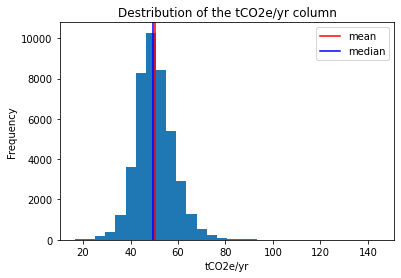

In [ ]:
# plot the distribution for tCO2e/yr

plt.figure()
plt.hist(emissions_df['Total Household Carbon Footprint (tCO2e/yr)'], bins=30)
plt.title('Destribution of the tCO2e/yr column')
plt.xlabel('tCO2e/yr')
plt.ylabel('Frequency')

# Plot the mean and median
plt.axvline(emissions_df['Total Household Carbon Footprint (tCO2e/yr)'].mean(), c='red', label='mean')
plt.axvline(emissions_df['Total Household Carbon Footprint (tCO2e/yr)'].median(), c='blue', label='median')
plt.legend()
plt.show()

In [ ]:
# Ben: See if you can now with the geometry data removed. In short there are no
# duplicates, because the merge ensured every row was unique. What is a very
# curious thing is the the abovementioned many-to-many relationship between zip
# and county.

In [ ]:
emissions_df.groupby(['CountyName', 'COUNTY']).size()

CountyName  COUNTY 
ABBEVILLE   45001.0     5
            45047.0     1
ACADIA      22001.0    10
            22055.0     2
            22097.0     1
                       ..
YUMA        8125.0      7
ZAPATA      48505.0     1
ZAVALA      48127.0     1
            48507.0     3
ZIEBACH     46137.0     2
Length: 10705, dtype: int64

slope:  0.9809549049836519 




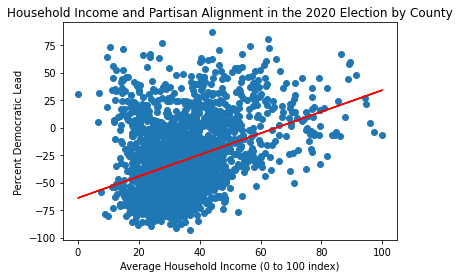

In [ ]:
# Average Household Income on a 0 to 100 scale
x = county_voting_footprint_df.IncomePerHousehold
x = (x-x.min())/(x.max()-x.min())*100
# Percent Republican Lead
y = (county_voting_footprint_df.votes_dem - county_voting_footprint_df.votes_rep) / county_voting_footprint_df.votes_total * 100
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.title('Household Income and Partisan Alignment in the 2020 Election by County')
plt.xlabel('Average Household Income (0 to 100 index)')
plt.ylabel('Percent Democratic Lead')
plt.plot(x, m*x + b, 'r')
print("slope: ", m, "\n\n")
plt.show()

slope:  0.4107006496307212 




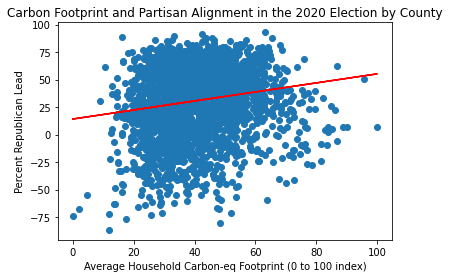

In [ ]:
# Average Household Footprint on a 0 to 100 scale
x = county_voting_footprint_df.footprint_tCO2eq / county_voting_footprint_df.HouseholdsPerCounty
x = (x-x.min())/(x.max()-x.min())*100
# Percent Republican Lead
y = (county_voting_footprint_df.votes_rep - county_voting_footprint_df.votes_dem) / county_voting_footprint_df.votes_total * 100
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.title('Carbon Footprint and Partisan Alignment in the 2020 Election by County')
plt.xlabel('Average Household Carbon-eq Footprint (0 to 100 index)')
plt.ylabel('Percent Republican Lead')
plt.plot(x, m*x + b, 'r')
print("slope: ", m, "\n\n")
plt.show()

In [ ]:
# create relative_vote_share column for rep
county_voting_footprint_df['relative_votes_rep'] = (county_voting_footprint_df.votes_rep / county_voting_footprint_df.votes_total) * 100
county_voting_footprint_df.head(1)

,COUNTY,votes_dem,votes_rep,votes_total,IncomePerHousehold,HouseholdsPerCounty,footprint_tCO2eq,TotalIncome,relative_votes_rep
0,4001,22730.0,11240.0,34397.0,22864.954358,30939.456343,1.206455e+06,7.074293e+08,32.677268


In [ ]:
# create relative_vote_share column for dem
county_voting_footprint_df['relative_votes_dem'] = (county_voting_footprint_df.votes_dem / county_voting_footprint_df.votes_total) * 100
county_voting_footprint_df.head(1)

,COUNTY,votes_dem,votes_rep,votes_total,IncomePerHousehold,HouseholdsPerCounty,footprint_tCO2eq,TotalIncome,relative_votes_rep,relative_votes_dem
0,4001,22730.0,11240.0,34397.0,22864.954358,30939.456343,1.206455e+06,7.074293e+08,32.677268,66.081344


In [ ]:
# create majority of votes column
# 1 = rep, 0 = dem
county_voting_footprint_df['maj_vote'] = np.where(county_voting_footprint_df['relative_votes_rep'] > 50, 1, 0)
county_voting_footprint_df.head(1)

,COUNTY,votes_dem,votes_rep,votes_total,IncomePerHousehold,HouseholdsPerCounty,footprint_tCO2eq,TotalIncome,relative_votes_rep,relative_votes_dem,maj_vote
0,4001,22730.0,11240.0,34397.0,22864.954358,30939.456343,1.206455e+06,7.074293e+08,32.677268,66.081344,0


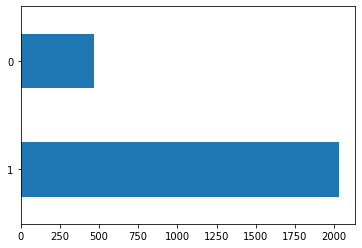

In [ ]:
# Visualise
county_voting_footprint_df['maj_vote'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
# merge geometry (lat and long) columns onto county codes
# dataset from https://data.beta.nyc/dataset/state-county-and-county-seat-data-set
# will attempt to map correlation now

county_geo = pd.read_csv('/content/drive/My Drive/Data Science/BrainStation/Colab/data/seatsandcounties-utf8.csv')
county_geo.head(3)

,StateAbbrev,CountySeat,CountyName,CountyFIPS,StateName,UniqueCountyNames_stateAbbr,Latitude,Longitude
0,NY,New York,New York,36061,New York,NY,40.75205,-73.994517
1,NY,Unknown,Unknown,36000,New York,NY,40.75215,-73.994517
2,IN,LaPorte,LaPorte,18091,Indiana,IN,41.41204,-86.779640


In [ ]:
county_geo.drop(columns=['StateAbbrev', 'CountySeat', 'CountyName', 'StateName'], inplace=True)

In [ ]:
# rename the CountyFIPS column to COUNTY for another merge
county_geo.rename(columns={"CountyFIPS": "COUNTY"}, inplace=True)

In [ ]:
geo_footprint = pd.merge(county_voting_footprint_df, county_geo, how='left', on='COUNTY')
geo_footprint.head(2)

,COUNTY,votes_dem,votes_rep,votes_total,IncomePerHousehold,HouseholdsPerCounty,footprint_tCO2eq,TotalIncome,relative_votes_rep,relative_votes_dem,maj_vote,UniqueCountyNames_stateAbbr,Latitude,Longitude
0,4001,22730.0,11240.0,34397.0,22864.954358,30939.456343,1.206455e+06,7.074293e+08,32.677268,66.081344,0,AZ,33.815834,-109.202378
1,4003,22997.0,33580.0,57672.0,33220.822488,51169.539205,2.296048e+06,1.699894e+09,58.225829,39.875503,1,AZ,31.965389,-110.296656


In [ ]:
geo_footprint.shape

(2507, 14)

## Further visualizing correlations

In [ ]:
# testing package

import plotly.express as px
fig = px.scatter(geo_footprint, x="footprint_tCO2eq", y="relative_votes_dem", size="footprint_tCO2eq", color="maj_vote",
           hover_name="UniqueCountyNames_stateAbbr", log_x=True, size_max=60)
fig.show()

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Choropleth(
#     locations = geo_footprint['UniqueCountyNames_stateAbbr'], # Spatial coordinates
#     z = geo_footprint['footprint_tCO2eq'].astype(float), # Data to be color-coded
#     locationmode = 'USA-states', # set of locations match entries in `locations`
#     colorscale = 'Bluered',
#     colorbar_title = "footprint_tCO2eq",
# ))

# title = f'Correlation between party alignment and footprint_tCO2eq'
# fig.update_layout(
#     title_text = title, #'2020 US Presidential Election',
#     geo_scope='usa', # limit map scope to USA
# )

# fig.show()

In [ ]:
## Duncan: I'm wondering what your thoughts are on next steps with this exploratory research. 
## I'm pretty new to working with geo-data but will try to visualize the results from analysis  
## and show what the relationship is between party alignment and household carbon footprin, as planned

## Depending on whether or not we find anything interesting, I was thinking of writing an article 
## and sharing some results on the analysis.

## I'll outline some notes I came across when putting together a data-journalism story
## taken from this article: https://datajournalism.com/read/longreads/hypothesis-data-journalism


You can apply this general list of questions nearly to every data story that dives into the roots of the problem and aims to build a concise narrative around it:


## Problem:
How big is the problem?
Is it getting worse or better?
## Impact:
Which category of people is more likely to experience the consequences of the problem/benefit from the situation?
How does the problem affect this group of people?
## Cause:
What are the main causes explaining why the problem is disproportionately affecting these people?
Which factors have contributed to this?
## Solution:
What needs to be fixed for the impacted group of people to mitigate the consequences or solve the problem for them?
How much would it cost and is there a source of money for this?
Has anybody already tried to solve this problem, here or elsewhere?
How can we measure the effectiveness?


These questions help the story remain focused on the specific hypothesis that the journalists have set out to prove or disprove. The questions ensure they drill deep into the issue and explain the problem from various angles using data. A great data hypothesis consists of questions that can be answered with data to prove or disprove it.
 

